

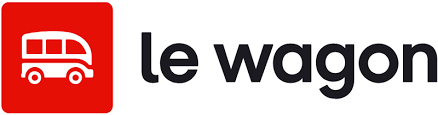



In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Voici les liens vers toutes les tables dont vous aurez besoin pour cet exercice**

[customers](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/customers.csv)

[orders](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/orders.csv)

[products](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/products.csv)

[reviews](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/reviews.csv)

**[Ici](https://docs.google.com/document/d/11OjoSgwxq1ncfvUyI9MUEykWux3taaaB/edit?usp=sharing&ouid=118418936069378180520&rtpof=true&sd=true) vous retrouverez un document explicitant toutes les tables et données présentes dans vos datasets**

Vous travaillez dans l'équipe data de GreenThumb. Votre objectif sera de travailler avec les données de l'entreprise pour explorer la donnée et valider ou invalider une hypothèse.

# 1. Découverte de la donnée

Vous souhaitez analyser les ventes de produits de GreenThumb.

- Quelles données allez-vous utiliser ?

- Utilisez Pandas pour charger ces tables et enregistrez-les dans les variables **sales_df** et **products_df**

In [73]:
sales_df = pd.read_csv("./orders.csv")
products_df = pd.read_csv("./products.csv")

Vérifiez s'il y a des doublons ou des valeurs manquantes dans les dataframes **sales_df** et **products_df**.

Si vous en trouvez, corrigez-les en utilisant des méthodes Python.

In [74]:
# verif doublons dans sales_df
duplicates_sales = sales_df[sales_df.duplicated()]
print("doublons dans sales_df :", len(duplicates_sales))

doublons dans sales_df : 9400


In [75]:
#verif doublons dans products_df
duplicates_products = products_df[products_df.duplicated()]
print("doublons dans products_df :", len(duplicates_products))
# pas de doublons trouvés dans les products #

doublons dans products_df : 0


In [76]:
# verif valeurs manquantes dans sales_df
missing_sales = sales_df.isnull().sum()
print("Valeurs manquantes dans sales_df :\n", missing_sales)

#verif des valeurs manquantes dans products_df
missing_products = products_df.isnull().sum()
print("Valeurs manquantes dans products_df :\n", missing_products)

# pas de valeurs manquantes trouvées #

Valeurs manquantes dans sales_df :
 OrderID          0
Date             0
CustomerID       0
ProductID        0
NumberOfUnits    0
dtype: int64
Valeurs manquantes dans products_df :
 ProductID       0
ProductName     0
LaunchDate      0
ProductDesc     0
ProductCat      0
PlantType       0
Tier            0
InitialPrice    0
dtype: int64


In [77]:
print("nombres de lignes dans sales_df ", len(sales_df))
#suppression des doublons dans sales_df, car nombre negligeables (9400) par rapport aux nombres de lignes totales de la df
sales_df = sales_df.drop_duplicates()
print("nombres de lignes dans sales_df aprés suppression des doublons", len(sales_df))

nombres de lignes dans sales_df  951705
nombres de lignes dans sales_df aprés suppression des doublons 942305


Utilisez Python pour effectuer une jointure entre les dataframes **sales_df** et **products_df**. Enregistrez le résultat dans un nouveau dataframe nommé **prod_sales_df**.

In [78]:
# jointure  sur la colonne ProductID
prod_sales_df = pd.merge(sales_df, products_df, on='ProductID', how='inner')
print(prod_sales_df.head()) 

   OrderID        Date  CustomerID  ProductID  NumberOfUnits   ProductName  \
0   770424  2023-06-10        3755          1              2  Fern Fantasy   
1   207311  2018-06-03        1578          1              4  Fern Fantasy   
2   193005  2018-03-18        1419          1              2  Fern Fantasy   
3   179733  2018-01-02         761          1              2  Fern Fantasy   
4   285754  2019-06-29        1292          1              6  Fern Fantasy   

   LaunchDate                                        ProductDesc  \
0  2018-11-08  A lush collection of various fern species, per...   
1  2018-11-08  A lush collection of various fern species, per...   
2  2018-11-08  A lush collection of various fern species, per...   
3  2018-11-08  A lush collection of various fern species, per...   
4  2018-11-08  A lush collection of various fern species, per...   

      ProductCat PlantType     Tier  InitialPrice  
0  Indoor Plants   Outdoor  Premium           121  
1  Indoor Plants  

Utilisez UNE méthode Python pour extraire toutes les statistiques du dataframe **prod_sales_df** (moyenne, nombre de valeurs, déviation standard, etc.).

In [79]:
prod_sales_df.describe()

,OrderID,CustomerID,ProductID,NumberOfUnits,InitialPrice
count,942305.000000,942305.000000,942305.000000,942305.000000,942305.000000
mean,471141.985217,1595.044130,11.959089,3.681724,39.389310
std,272014.003511,1213.633479,7.123611,7.094185,43.164596
min,1.000000,1.000000,1.000000,-1.000000,5.000000
25%,235570.000000,541.000000,6.000000,1.000000,6.000000
50%,471143.000000,1292.000000,11.000000,1.000000,10.000000
75%,706712.000000,2617.000000,18.000000,4.000000,68.000000
max,942283.000000,4075.000000,25.000000,558.000000,126.000000


Il semble qu'il y ait une valeur aberrante dans l'une des colonnes. Identifiez cette colonne et supprimez les lignes contenant la valeur aberrante.

In [80]:
#je remarque que pour la colonne NumberOfUnits la valeur minimale est -1, ce qui est inattendu pour une quantité commandée

# supp les lignes avec NumberOfUnits aberrant
prod_sales_df = prod_sales_df[prod_sales_df['NumberOfUnits'] >= 0]

# vérification
print(prod_sales_df['NumberOfUnits'].describe())

count    941354.000000
mean          3.686454
std           7.096206
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max         558.000000
Name: NumberOfUnits, dtype: float64


Quelle est la répartition des ventes de produits par catégorie ? Utilisez la bibliothèque de votre choix pour créer un graphique représentant cette répartition.

In [81]:
# La répartition des ventes par catégorie
ventes_par_cat = prod_sales_df.groupby('ProductCat')['NumberOfUnits'].sum()
print("Répartition des ventes par catégorie :\n", ventes_par_cat)

Répartition des ventes par catégorie :
 ProductCat
Climbing Plants      413320
Edible Plants        257285
Flowering Plants    1681531
Indoor Plants        810856
Indoor Trees         158166
Outdoor Plants       149100
Name: NumberOfUnits, dtype: int64


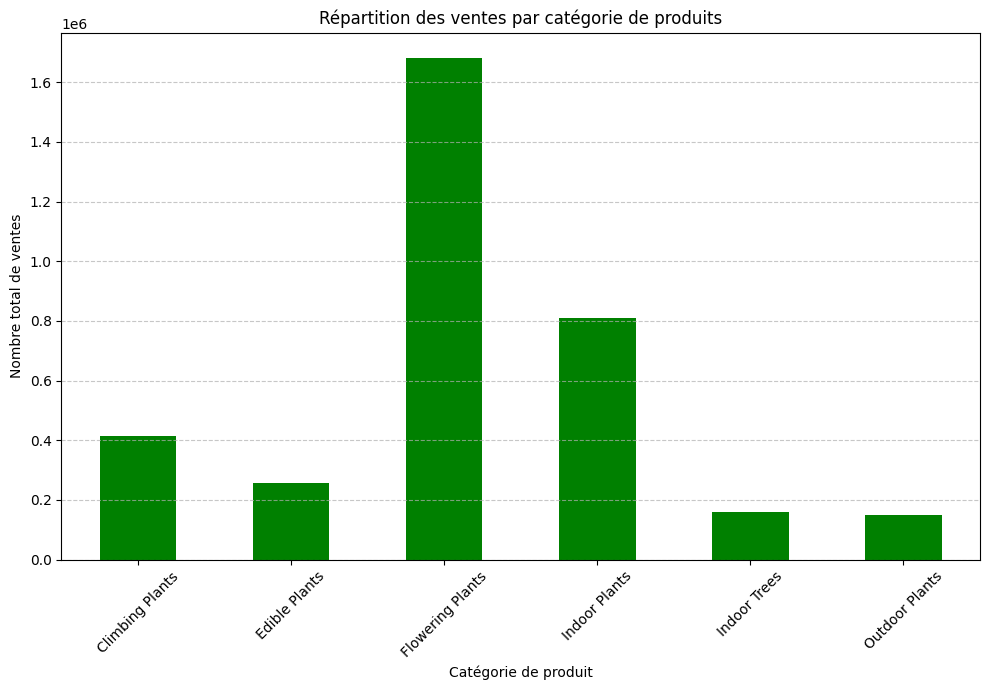

In [82]:
# Viz graphique répartition des ventes par catégorie de produits
plt.figure(figsize=(10, 7))
ventes_par_cat.plot(kind='bar', color='green')
plt.title('Répartition des ventes par catégorie de produits')
plt.xlabel('Catégorie de produit')
plt.ylabel('Nombre total de ventes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Analyse exploratoire de la donnée


L'objectif de GreenThumb est d'améliorer ses performances de ventes. Voici quelques pistes possibles :

- Se concentrer sur certaines catégories de produits
- Se focaliser sur certaines gammes de prix
- Proposer des réductions aux clients après un certain nombre d'achats

**Tâches :**

- Utilisez les tables disponibles pour mener une analyse exploratoire sur l'une de ces pistes afin de déterminer si elle peut améliorer les ventes de GreenThumb.

- Étayer vos propos avec au moins un graphique conforme aux normes WCAG.
Utilisez des tests statistiques si cela est pertinent.
La conclusion peut être que cette piste n'est pas la bonne.

**Livrables :**

- Graphique(s) pour appuyer votre analyse.
- Courte présentation vidéo (1 min 30) présentant votre travail et vos conclusions.

Pour enregistrer votre présentation, vous allez utiliser Loom uploader le lien de votre vidéo sur Assess. Voici [lien](https://lewagon.notion.site/lewagon/Loom-cdb8c6096d3d4bc7808aab854569344d) vers les guidelines.

Une fois la vidéo réalisée, soumettez le lien de votre notebook finalisé et le lien URL de la vidéo sur la plateforme Assess.


[Argumentez votre conclusion ici et proposez au moins un graphique]

In [83]:
# Agréger les données par gamme de prix
ventes_par_gammes = prod_sales_df.groupby("Tier").agg({"NumberOfUnits": "sum", "InitialPrice": "sum"}).reset_index()
ventes_par_gammes


,Tier,NumberOfUnits,InitialPrice
0,Basic,1667445,3020616
1,Premium,1235178,30705100
2,Standard,567635,3353822


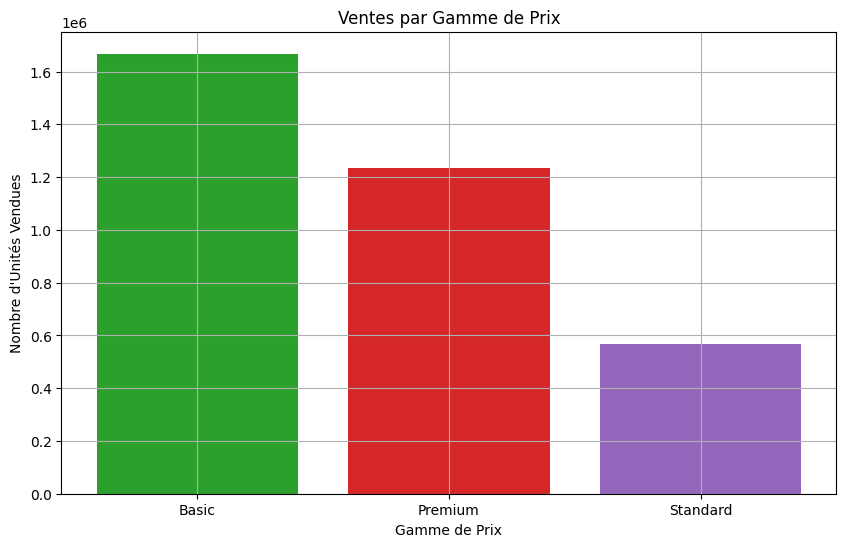

In [84]:
# Graphique des ventes par gamme de prix
plt.figure(figsize=(10, 6))
plt.bar(ventes_par_gammes["Tier"], ventes_par_gammes["NumberOfUnits"], color=['#2ca02c', '#d62728', '#9467bd'])
plt.xlabel('Gamme de Prix')
plt.ylabel('Nombre d\'Unités Vendues')
plt.title('Ventes par Gamme de Prix')
plt.grid(True)
plt.show()


Hypothèse nulle (H0) : Il n'y a pas de différence significative entre les moyennes des ventes des différentes gammes de prix.

H1: Il y a au moins une différence significative entre les moyennes des ventes des différentes gammes de prix

In [85]:
from scipy.stats import f_oneway

#  extraire les ventes pour chaque gamme de prix
sales_premium = prod_sales_df[prod_sales_df["Tier"] == "Premium"]["NumberOfUnits"]
sales_basic = prod_sales_df[prod_sales_df["Tier"] == "Basic"]["NumberOfUnits"]
sales_standard = prod_sales_df[prod_sales_df["Tier"] == "Standard"]["NumberOfUnits"]

# test ANOVA one way
f_stat, p_val = f_oneway(sales_premium, sales_basic, sales_standard)

f_stat, p_val

(0.25594144711322203, 0.7741873523817726)

F faible (0.2559) indique que la variance entre les groupes (Premium, Basic, Standard) est très petite par rapport à la variance des groupes alors les différences de ventes entre les groupes de prix ne sont pas grandes. De plus, on a une p-valeur de 0,774, ce qui est bien au-dessus du seuil habituel de 0,05. 

Ce qui signifie qu'il n'y a pas de différence statistiquement significative entre les ventes des différentes gammes de prix (Premium, Basic, Standard). 

Donc, se concentrer sur certaines gammes de prix ne semble pas être une piste efficace pour améliorer les ventes de GreenThumb.

Il peut être bénéfique de se concentrer sur les catégories de produits qui montrent des ventes plus élevées. Par exemple, si les produits Indoor se vendent mieux, GreenThumb pourrait envisager de diversifier et d'augmenter l'offre dans cette catégorie.